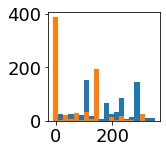

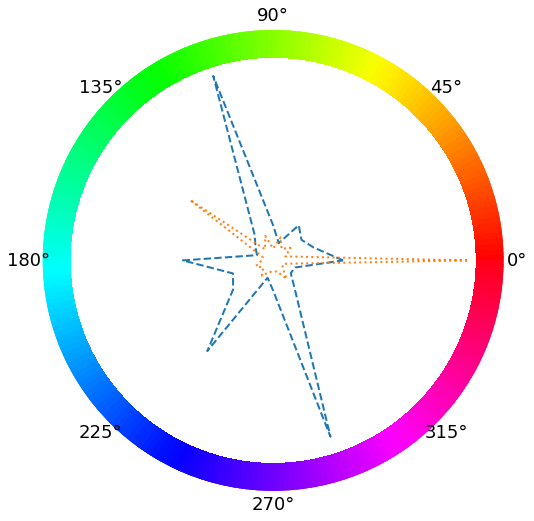

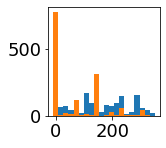

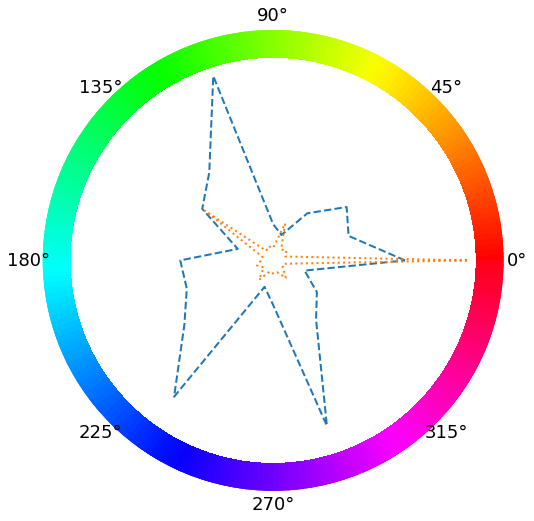

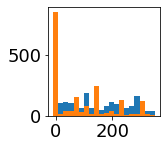

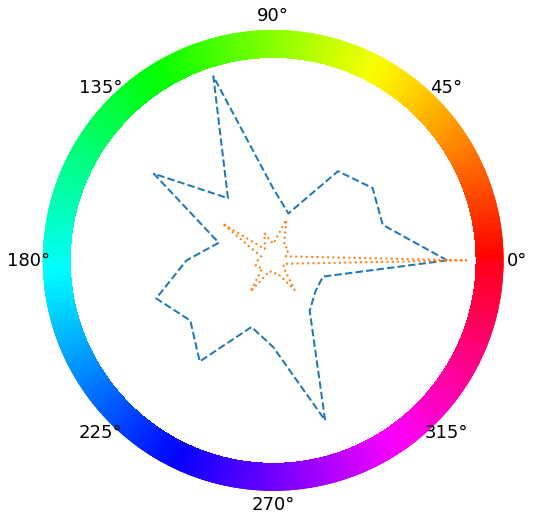

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
import numpy as np

from matplotlib import cm
import matplotlib as mpl

layers = {'retina_relu2', 'ventral_relu0', 'ventral_relu1'}

for layer in layers:
    plt.figure(figsize=(2,2))
    frame = pd.read_pickle('logs/devalois.pd')
    frame = frame[frame['layer'] == layer]
    frame = frame[frame['class'] == 'spectrally opponent']
    exc = plt.hist(frame['max_params'], bins=20, align='left', range=(0,360))
    inh = plt.hist(frame['min_params'], bins=20, align='left', range=(0,360))

    # Generate a figure with a polar projection
    fg = plt.figure(figsize=(8,8))
    ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

    # Define colormap normalization for 0 to 2*pi
    norm = mpl.colors.Normalize(0, 2*np.pi) 

    # Plot a color mesh on the polar plot
    # with the color set by the angle

    n = 2000  #the number of secants for the mesh
    t = np.linspace(0,2*np.pi,n)   #theta values
    r = np.linspace(.85,1,2)        #radius values change 0.6 to 0 for full circle
    rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
    c = tg                         #define color values as theta value
    im = ax.pcolormesh(t, r, c.T,norm=norm, cmap='hsv')  #plot the colormesh on axis with colormap
    ax.set_yticklabels([])                   #turn of radial tick labels (yticks)
    ax.spines['polar'].set_visible(False)    #turn off the axis spine.

    def get_data(x, m):
        my_x = list(x[1])
        my_x.append(my_x[len(my_x) - 1] + my_x[1])
        my_x = [my_x[i] - 9 for i in range(len(my_x))]
        xs = [(my_x[i+1] - my_x[i]) / 2. + my_x[i] for i in range(len(my_x) - 1)]
        xs = [(xs[i] / 360.) * 2 * np.pi for i in range(len(xs))]

        ys = list(x[0])
        ys.append(ys[0])
        ys = [(ys[i] / m) - 0.2 for i in range(len(ys))]
        return xs, ys

    exc1, exc2 = get_data(exc, max(list(exc[0])))
    inh1, inh2 = get_data(inh, max(list(inh[0])))

    plt.polar(exc1, exc2, linewidth=2, linestyle='--', label='Excitators')
    plt.polar(inh1, inh2, linewidth=2, linestyle=':', label='Inhibitors')

    plt.savefig('figures/' + layer + '.eps')